In [102]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
# importing the sklearn dataset
wine = datasets.load_wine()

In [104]:
# importing the dataset into pandas DataFrame
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']

In [105]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [106]:
data.shape

(178, 14)

In [107]:
# checking for null-values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [108]:
# Splitting the data into features and target
X = data.drop(['target'], axis=1)
y = data['target']

In [109]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [110]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [111]:
print(X.shape, y.shape)

(178, 13) (178,)


In [133]:
# Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(178, 13) (142, 13) (36, 13)
(178,) (142,) (36,)


In [135]:
# Creating the Model

model = KNeighborsClassifier(n_neighbors=3)

In [136]:
# Training the Model

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [137]:
#prediction on training data
prediction_on_training_set = model.predict(X_train)
training_accuracy = accuracy_score(y_train, prediction_on_training_set)

print(f'Accuracy on training data = {training_accuracy}')

#prediction on test data
prediction_on_test_set = model.predict(X_test)
test_accuracy = accuracy_score(y_test, prediction_on_test_set)

print(f'Accuracy on test data = {test_accuracy}')

Accuracy on training data = 0.8591549295774648
Accuracy on test data = 0.8055555555555556


In [117]:
# Tuning Sensitivity of Model to n_neighbors

k_range = range(1, 30)
Accuracy = []
for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  Accuracy.append(model.score(X_test, y_test))

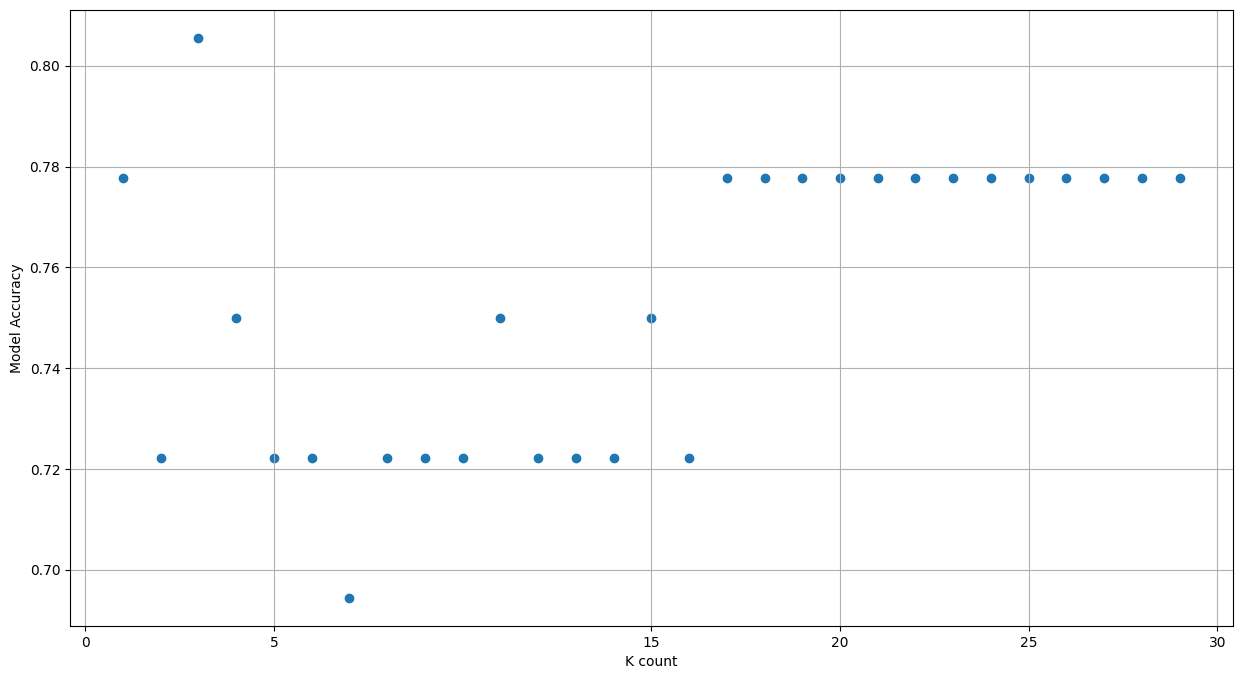

In [118]:
plt.figure(figsize=(15, 8))
plt.xlabel('K count')
plt.ylabel('Model Accuracy')
plt.scatter(k_range, Accuracy)
plt.grid()
plt.xticks([0, 5, 15, 20, 25, 30])
plt.show()

Text(0, 0.5, 'Accuracy')

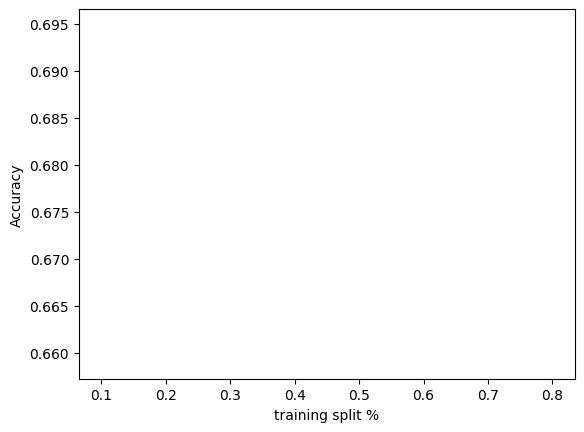

In [122]:
test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1]

model = KNeighborsClassifier(n_neighbors=5)

for test_size in test_sizes:
  Accuracy = []

  for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - test_size)
    model.fit(X_train, y_train)
    Accuracy.append(model.score(X_test, y_test))

  plt.plot(test_size, np.mean(Accuracy))

plt.xlabel("training split %")
plt.ylabel('Accuracy')

In [123]:
prediction = model.predict(X_test)

In [124]:
prediction

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1])

In [125]:
confusion_matrix = confusion_matrix(y_test, prediction)

In [126]:
confusion_matrix

array([[43, 10,  0],
       [ 2, 58,  3],
       [ 0, 40,  5]])

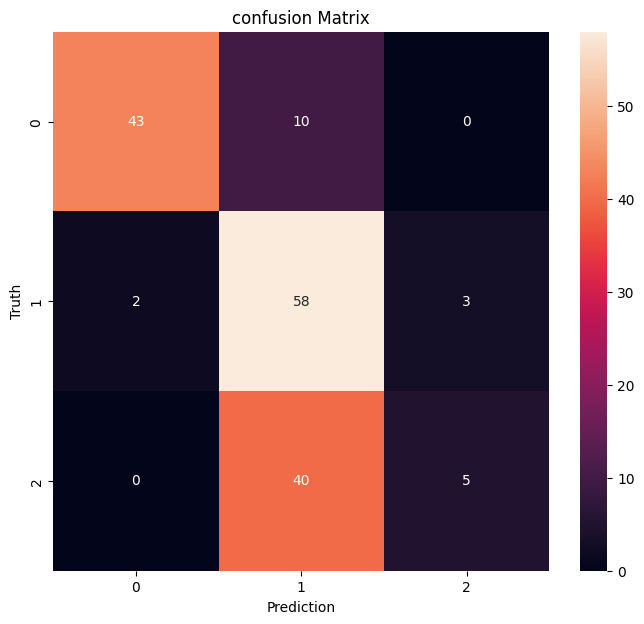

In [127]:
plt.figure(figsize=(8, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.title('confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()